In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.measure import label, regionprops_table

/home/mpgxc/anaconda3/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
def plot_images(images, color='gray', names=[]):
 
    """
        Função para plotar array de imagens, essa função não é perfeita mas serve bem...
    """
    
    if len(names) == 0:
        names = [""] * len(images)
        
    if len(images) == 1:
        plt.figure(figsize=(10, 8))
        plt.imshow(images[0], color)
    
        return plt.show()
    
    fig, ax = plt.subplots(1,
                           len(images), 
                           figsize=(15, 20))

    for index, arr in enumerate(images):        
        ax[index].imshow(arr, cmap=color)
        ax[index].set_title(names[index])
            
    plt.show()

In [132]:
mask = imread('images_masks_cropped/masks/002/54_mask.tif')
mask1 = imread('images_masks_cropped/masks/002/92_mask.tif')

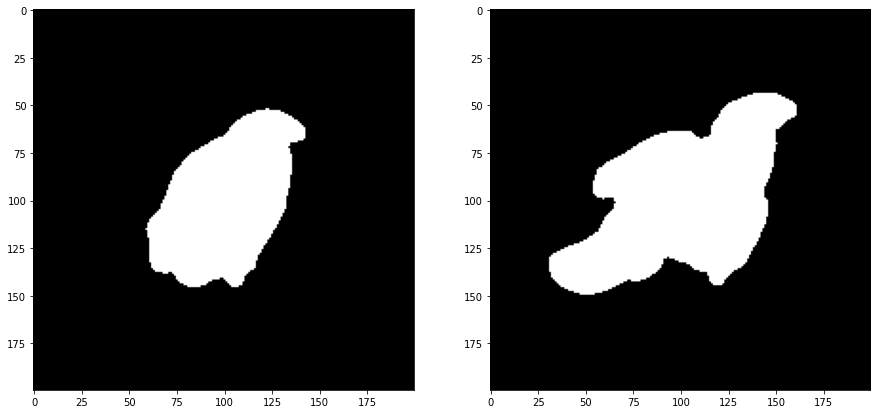

In [133]:
plot_images([mask, mask1])

In [134]:
def extract_props_from_image(mask):
    
    label_image = label(mask)
    
    feature_names = ['label',
                     'bbox_area',
                     'solidity',
                     'centroid', 
                     'orientation',
                     'convex_area', 
                     'area',
                     'convex_area',
                     'filled_area',
                     'eccentricity', 
                     'extent',
                     'euler_number',
                     'eccentricity',
                     'major_axis_length',
                     'feret_diameter_max',
                     'inertia_tensor',
                     'perimeter',
                     'perimeter_crofton',
                     'minor_axis_length']
    
    return pd.DataFrame(regionprops_table(label_image, properties=feature_names))

In [139]:
extract_props_from_image(mask)

,label,bbox_area,solidity,centroid-0,centroid-1,orientation,convex_area,area,filled_area,eccentricity,...,euler_number,major_axis_length,feret_diameter_max,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,perimeter_crofton,minor_axis_length
0,1,7896,0.940696,100.711255,100.681148,-0.599551,5261,4949,4949,0.823653,...,1,106.621287,109.041277,381.969055,224.547917,224.547917,557.032609,302.391919,289.367033,60.464268


In [141]:
extract_props_from_image(mask1)

,label,bbox_area,solidity,centroid-0,centroid-1,orientation,convex_area,area,filled_area,eccentricity,...,euler_number,major_axis_length,feret_diameter_max,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,perimeter_crofton,minor_axis_length
0,1,13780,0.834187,100.330263,100.245094,-0.92952,8980,7491,7491,0.842937,...,1,141.057937,157.292721,927.366975,423.582614,423.582614,676.181408,446.859956,426.331321,75.890925
